<a href="https://colab.research.google.com/github/Fazlibeqir/Timski-Proekt/blob/main/compare_all_versions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

paths = {
    "YOLOv8-s": "/content/drive/MyDrive/Insect Detection/utils/results.csv",
    "YOLOv8-m": "/content/drive/MyDrive/Insect Detection/utils/resultsV2.csv",
    "YOLOv8-x": "/content/drive/MyDrive/Insect Detection/utils/resultsV3.csv"
}

In [6]:
# Load and label data
dfs = []
for model, path in paths.items():
    df = pd.read_csv(path)
    df["model"] = model
    dfs.append(df)

# Combine all data
df_all = pd.concat(dfs, ignore_index=True)

In [7]:
metrics_to_plot = [
    ("train/loss", "Training Loss"),
    ("val/loss", "Validation Loss"),
    ("metrics/accuracy_top1", "Top-1 Accuracy"),
    ("metrics/accuracy_top5", "Top-5 Accuracy")
]

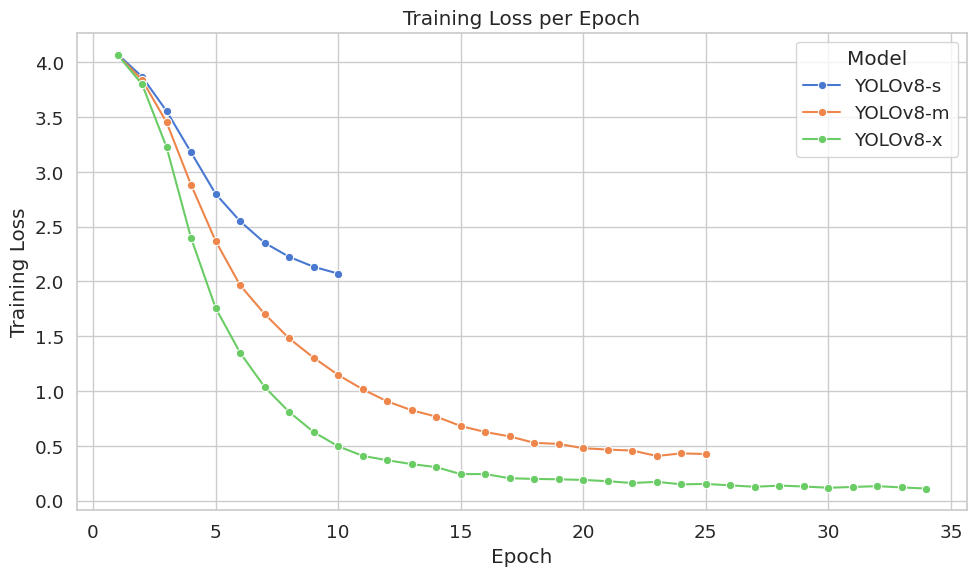

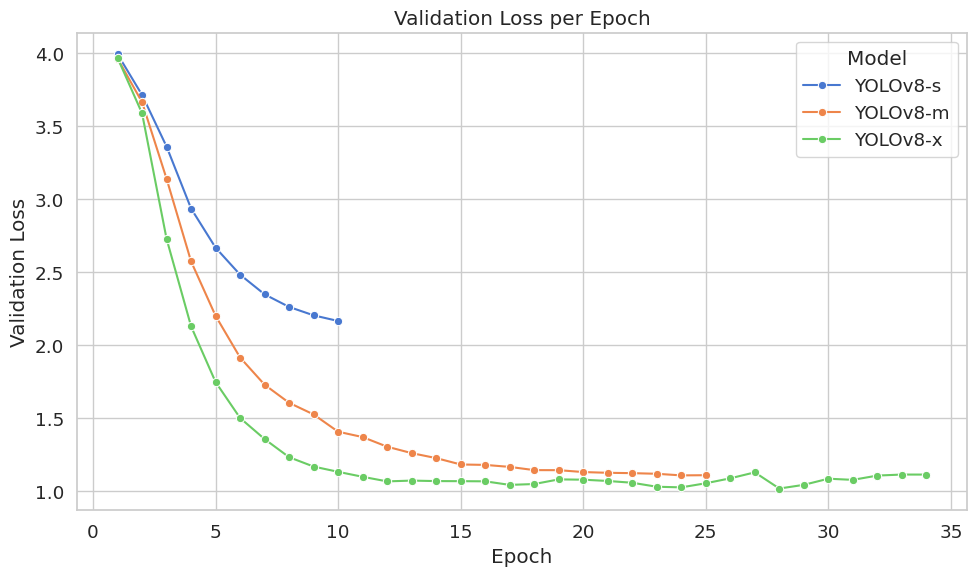

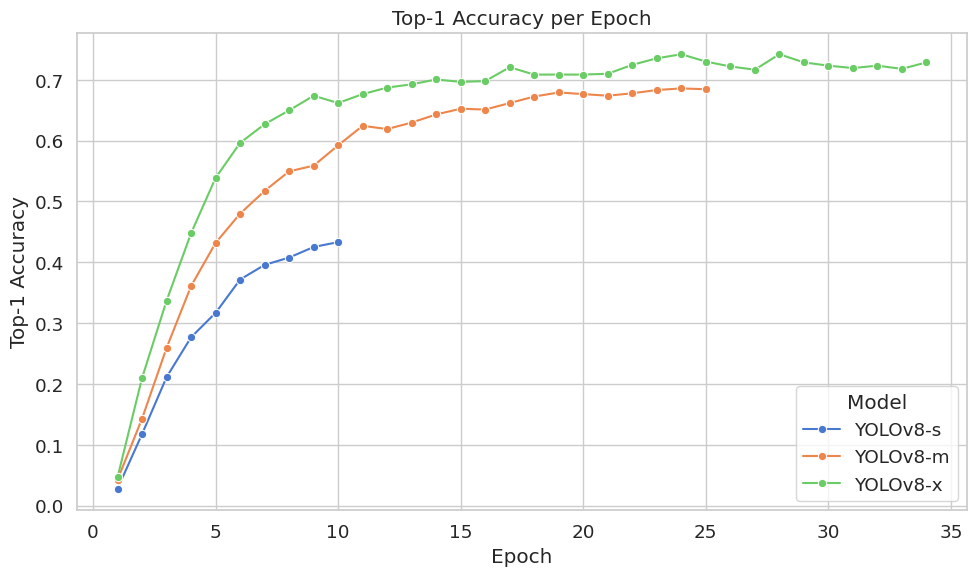

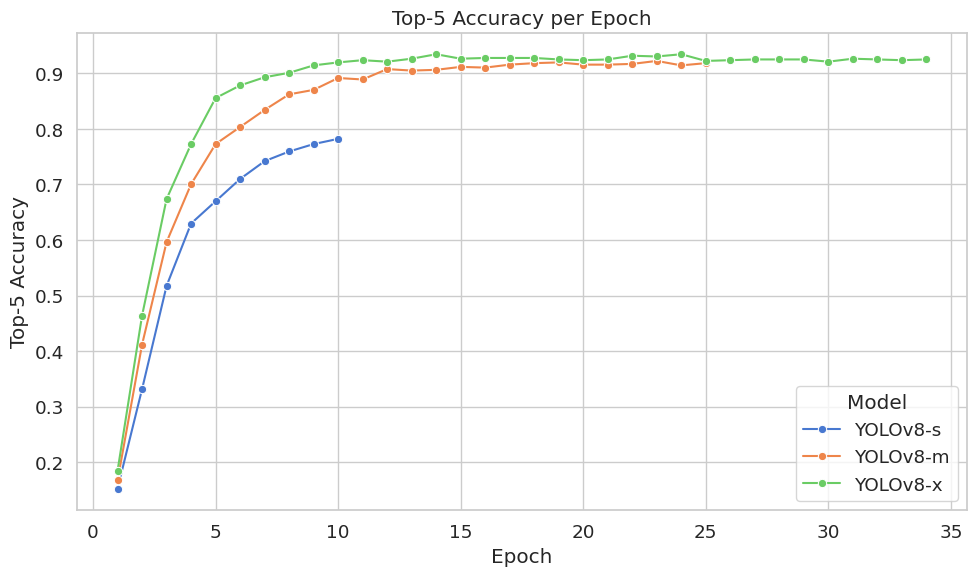

In [8]:
for metric, title in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_all, x="epoch", y=metric, hue="model", marker="o")
    plt.title(f"{title} per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel(title)
    plt.legend(title="Model")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


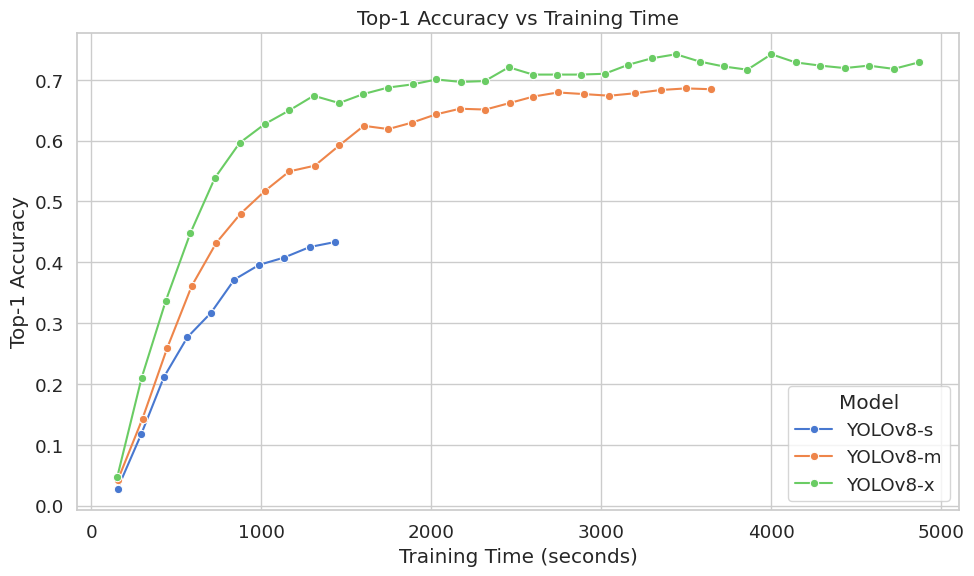

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_all, x="time", y="metrics/accuracy_top1", hue="model", marker="o")
plt.title("Top-1 Accuracy vs Training Time")
plt.xlabel("Training Time (seconds)")
plt.ylabel("Top-1 Accuracy")
plt.legend(title="Model")
plt.grid(True)
plt.tight_layout()
plt.show()
